In [2]:
import numpy as np
import matplotlib.pyplot as plt

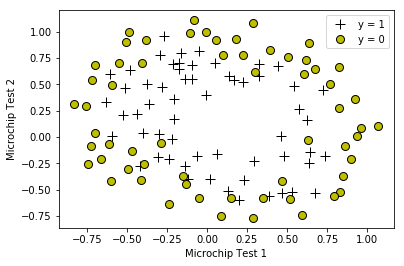

In [3]:
# Plotting Data

def plotData(x, y):
    pos = y == 1
    neg = y == 0
    plt.plot(x[pos, 0], x[pos, 1], 'k+', lw = 2, ms = 10)
    plt.plot(x[neg, 0], x[neg, 1], 'ko', mfc = 'y', ms = 8)
    
data = np.loadtxt('ex2data2.txt', delimiter=',') 
X_orig, y_orig = data[:, 0:2], data[:, 2]
plotData(X_orig, y_orig)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y = 1', 'y = 0'])

In [4]:
# Mapping Feature

def mapFeature(x1, x2):
    degree = 6
    out = np.ones((x1.size,1))
    for i in range(1, degree + 1, 1):
        for j in range(0, i + 1, 1):
            temp = x1 ** (i - j) * x2 ** (j)
            temp = temp.reshape((x1.size,1))
            out = np.hstack((out, temp))
    return out

X = mapFeature(X_orig[:, 0], X_orig[:, 1])
m, n = X.shape
y = y_orig.reshape((m, 1))

In [6]:
# Regularized Logistic Regression

def sigmoid(z):
    g = 1 / (1 + np.exp(-z))
    
    return g

def costFunctionReg(theta, x, y, lamb):
    m = y.size
    h = sigmoid(np.dot(x, theta))
    J = (-np.dot(y.T, np.log(h)) - np.dot((1 - y).T, np.log(1 - h)))/ m + lamb * (np.sum(theta ** 2) - theta[0] ** 2) / (2 * m) ;
    grad = np.dot(x.T, h - y) / m + lamb * theta / m
    grad[0] = grad[0] - lamb * theta[0] / m
    return J, grad

initial_theta = np.zeros((n, 1))
lamb = 1
cost, grad = costFunctionReg(initial_theta, X, y, lamb)
print('Cost at initial theta (zeros): %f\n' %cost)
print('Gradient at initial theta (zeros) - first five values only:\n');
print(grad[:5, :])

Cost at initial theta (zeros): 0.693147

Gradient at initial theta (zeros) - first five values only:

[[8.47457627e-03]
 [1.87880932e-02]
 [7.77711864e-05]
 [5.03446395e-02]
 [1.15013308e-02]]


lambda = 1:
iter=0,cost=0.693147 
iter=200,cost=0.596406 
iter=400,cost=0.562773 
iter=600,cost=0.546815 
iter=800,cost=0.538707 
iter=1000,cost=0.534416 
iter=1200,cost=0.532078 
iter=1400,cost=0.530777 
iter=1600,cost=0.530040 
iter=1800,cost=0.529617 
iter=2000,cost=0.529370 
iter=2200,cost=0.529225 
iter=2400,cost=0.529138 
iter=2600,cost=0.529086 
iter=2800,cost=0.529055 
iter=3000,cost=0.529035 
iter=3200,cost=0.529023 
iter=3400,cost=0.529016 
iter=3600,cost=0.529011 
iter=3800,cost=0.529008 
iter=4000,cost=0.529006 
iter=4200,cost=0.529005 
iter=4400,cost=0.529004 
iter=4600,cost=0.529004 
iter=4800,cost=0.529003 


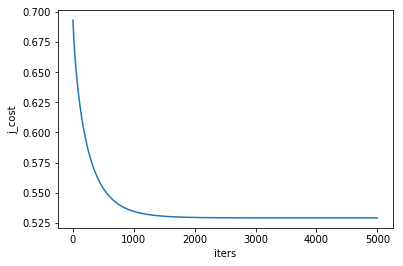

lambda = 0:
iter=0,cost=0.693147 
iter=200,cost=0.583820 
iter=400,cost=0.530682 
iter=600,cost=0.495442 
iter=800,cost=0.470184 
iter=1000,cost=0.451166 
iter=1200,cost=0.436322 
iter=1400,cost=0.424417 
iter=1600,cost=0.414664 
iter=1800,cost=0.406537 
iter=2000,cost=0.399669 
iter=2200,cost=0.393796 
iter=2400,cost=0.388723 
iter=2600,cost=0.384302 
iter=2800,cost=0.380418 
iter=3000,cost=0.376984 
iter=3200,cost=0.373928 
iter=3400,cost=0.371194 
iter=3600,cost=0.368734 
iter=3800,cost=0.366511 
iter=4000,cost=0.364493 
iter=4200,cost=0.362654 
iter=4400,cost=0.360972 
iter=4600,cost=0.359428 
iter=4800,cost=0.358006 
lambda = 5:
iter=0,cost=0.693147 
iter=200,cost=0.615520 
iter=400,cost=0.601457 
iter=600,cost=0.597942 
iter=800,cost=0.597002 
iter=1000,cost=0.596740 
iter=1200,cost=0.596664 
iter=1400,cost=0.596642 
iter=1600,cost=0.596635 
iter=1800,cost=0.596633 
iter=2000,cost=0.596632 
iter=2200,cost=0.596632 
iter=2400,cost=0.596632 
iter=2600,cost=0.596632 
iter=2800,cost=

In [7]:
# Batch gradient descent
# from https://github.com/TingNie/Coursera-ML-using-matlab-python/blob/master/logic_regularization.ipynb

def bgd(X, y, theta, lamb, alpha = 0.1, iters = 5000):
    J_history = []
    
    for i in range(iters):
        cost,grad = costFunctionReg(theta, X, y, lamb)
        theta = theta - alpha * grad
        J_history.append(float(cost))
        if i%200 == 0:
            print('iter=%d,cost=%f '%(i,cost))
    return theta, J_history

print('lambda = 1:')
theta, J_history = bgd(X, y, initial_theta, lamb)
plt.plot(J_history)
plt.xlabel('iters')
plt.ylabel('j_cost')
plt.show()

print('lambda = 0:')
lamb_1 = 0
theta_1, _ = bgd(X, y, initial_theta, lamb_1)

print('lambda = 5:')
lamb_2 = 3
theta_2, _ = bgd(X, y, initial_theta, lamb_2)

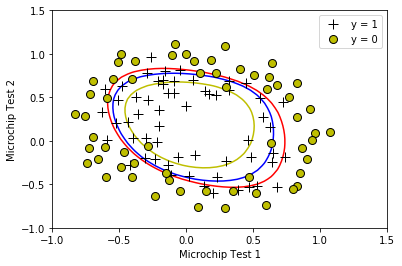

In [8]:
# Plot Boundary 

def plotDecisionBoundary(theta, x, y, c):
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    
    z = np.zeros((u.size, v.size))
    for i in range(u.size):
        for j in range(v.size):
            z[i, j] = np.dot(mapFeature(u[i], v[j]), theta)
    z = z.T
    plt.contour(u, v, z, [0.5], colors = c)

plotData(X_orig, y_orig)
plotDecisionBoundary(theta_1, X, y, 'r')
plotDecisionBoundary(theta, X, y, 'b')
plotDecisionBoundary(theta_2, X, y, 'y')

plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y = 1', 'y = 0'])

In [13]:
# Predict and Accuracies

def predict(theta, x):
    p = np.where(sigmoid(np.dot(x, theta)) >= 0.5, 1.0, 0)
    return p

p = predict(theta, X)
print('Train Accuracy: %f\n' %np.mean(p == y))

Train Accuracy: 0.830508

